<a href="https://colab.research.google.com/github/mahhhdy/SBU_DataMining_Python/blob/main/mobile_price_prediction_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# initial lib and chack for null value 

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from google.colab import drive

drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/phone price prediction train.csv'
path_test='/content/drive/MyDrive/DataSets/phone price prediction test.csv'

df=pd.read_csv(path)
df_test=pd.read_csv(path_test)
print(df.shape)
print(df_test.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2000, 21)
(1000, 21)


In [162]:
def newLine():
  print(" ")  
  print("-------------------------------")  
  print(" ") 

In [163]:
print("the maximum number of null values: ",df.isnull().sum().max())
newLine()
print("name and type of data fram column: ",df.info())

the maximum number of null values:  0
 
-------------------------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 no

In [164]:
df=df.rename(index=str, columns={"battery_power": "Battery Power",
                                 "blue": "Bluetooth",
                                 "clock_speed":"Clock Speed",
                                 "dual_sim":"Dual Sim",
                                 "fc":"Front Camera MP",
                                 "four_g":"4G",
                                 "int_memory":"Internal Memory(GB)",
                                 "m_dep":"Mobile Depth(CM)",
                                 "mobile_wt":"Weight",
                                 "n_cores":"Number of cores",
                                 "pc":"Primary Camera MP",
                                 "px_height":"Pixel R. Height",
                                 "px_width":"Pixel R. Width",
                                 "ram":"RAM(MB)",
                                 "sc_h":"Screen Height(cm)",
                                 "sc_w":"Screen Width",
                                 "talk_time":"Longest Battery Charge",
                                 "three_g":"3G",
                                 "touch_screen":"Touch Screen",
                                 "wifi":"WIFI",
                                 "price_range":"Price Range"})

In [165]:
df.head(10)

,Battery Power,Bluetooth,Clock Speed,Dual Sim,Front Camera MP,4G,Internal Memory(GB),Mobile Depth(CM),Weight,Number of cores,Primary Camera MP,Pixel R. Height,Pixel R. Width,RAM(MB),Screen Height(cm),Screen Width,Longest Battery Charge,3G,Touch Screen,WIFI,Price Range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


Text(0.5, 1.0, 'Correlation')

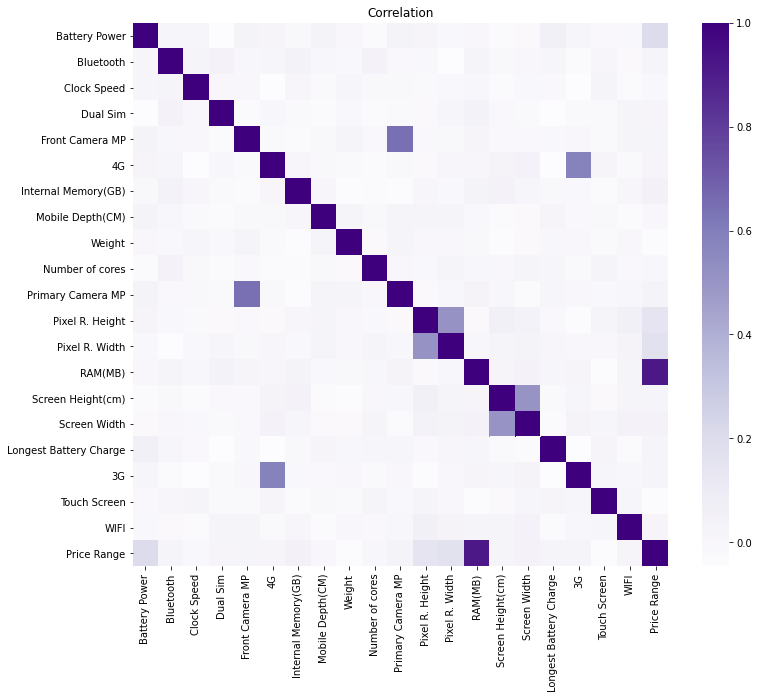

In [166]:
corrMatrix= df.corr()
f,ax = plt.subplots(figsize=(12,10))
r=sns.heatmap(corrMatrix ,cmap='Purples', annot_kws={'size':8})
r.set_title('Correlation')

there is no need to handle dummy variable or missing values

convert problem from problem with 4 class to problem with 2 class

In [167]:
df.price_range.replace({0:1},inplace=True)
df.price_range.replace({3:2},inplace=True)

AttributeError: ignored

In [ ]:
df['price_range'].unique()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
svc = SVC(kernel='linear').fit(X, y)

In [ ]:
X

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# plt.subplot(1, 1, 1)
# Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, linewidth=1, edgecolor='black')
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.xlim(xx.min(), xx.max())
# plt.title('SVC with linear kernel')